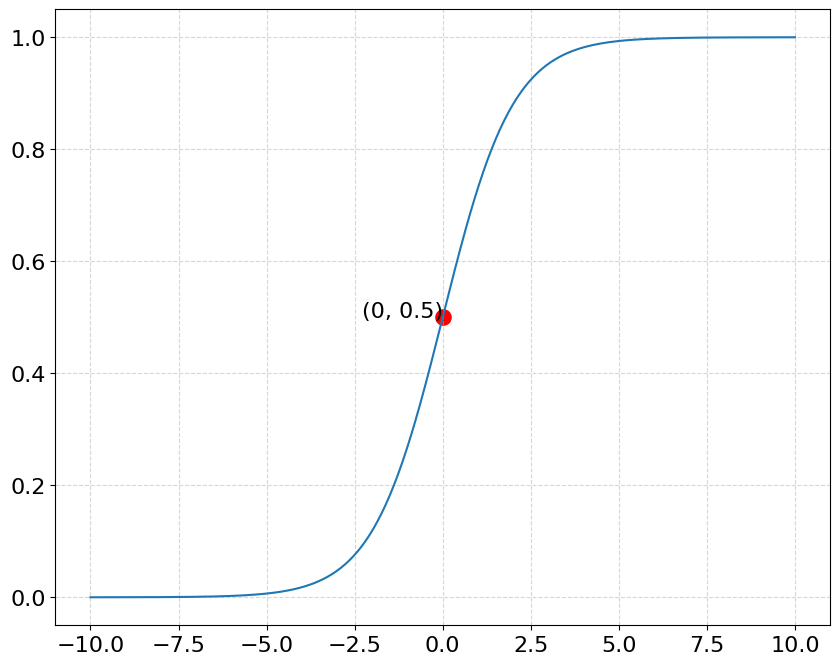

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.scatter(0, sigmoid(0), color='red', s=120)  
plt.text(0, sigmoid(0), '(0, 0.5)', fontsize=16, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [3]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
print(cancer.target_names)

['malignant' 'benign']


In [13]:
from sklearn.model_selection import train_test_split

x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print(log_reg.score(x_train, y_train))
print(log_reg.score(x_test, y_test))

0.9413145539906104
0.972027972027972


/Users/hughxusu/opt/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])
pipeline.fit(x_train, y_train)
print(pipeline.score(x_train, y_train))
print(pipeline.score(x_test, y_test))

0.9859154929577465
0.9790209790209791


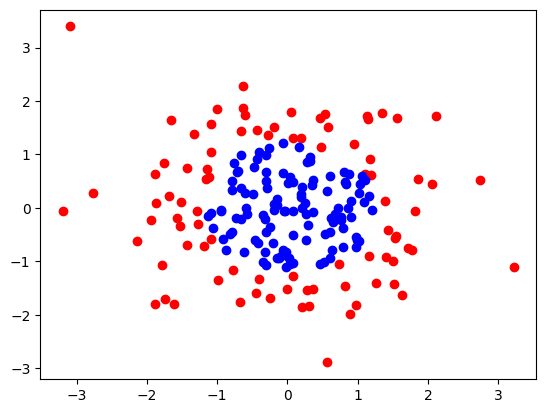

In [18]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype=int)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

def PolynomialLogisticRegression(degree, C=1):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(x_train, y_train)
print(poly_log_reg.score(x_train, y_train))
print(poly_log_reg.score(x_test, y_test))

0.9929577464788732
0.972027972027972


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

1.0


In [27]:
import joblib

x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])
pipeline.fit(x_train, y_train)
joblib.dump(pipeline, 'cancer.pkl')

['cancer.pkl']

In [28]:
model = joblib.load('cancer.pkl')
print(model.score(x_test, y_test))
result = model.predict(x_test)
print(result.shape)

0.9790209790209791
(143,)
